# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Brian Choi  
**Dataset:** Air Quality   
**Date:** 10/8/2025

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on Air Quality dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [ ]:
df_raw = pd.read_csv(
    "AirQualityUCI.csv",
    sep=";",              
    decimal=",",          
)

# Drop empty trailing column if present
empty_like = [c for c in df_raw.columns if c.strip() == "" or c.startswith("Unnamed")]
if empty_like:
    df_raw = df_raw.drop(columns=empty_like)

# Standardize names
df_raw.columns = [c.strip().replace(" ", "_").replace(".", "_") for c in df_raw.columns]

# Combine Date and Time to timestamp index
def _mk_ts(row):
    t = str(row["Time"]).strip().replace(".", ":")
    return f'{row["Date"]} {t}'
ts = pd.to_datetime(df_raw.apply(_mk_ts, axis=1), format="%d/%m/%Y %H:%M:%S", errors="coerce")
df = df_raw.copy()
df.insert(0, "timestamp", ts)
df = df.sort_values("timestamp").set_index("timestamp")

# Convert numeric and map -200 to NaN
num_cols = [c for c in df.columns if c not in ["Date", "Time"]]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")
    df.loc[df[c] == -200, c] = np.nan

# drop rows with no timestamp
df = df[~df.index.isna()]

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (9357, 15)


Date      Time  CO(GT)  PT08_S1(CO)  NMHC(GT)  \
timestamp                                                                  
2004-03-10 18:00:00  10/03/2004  18.00.00     2.6       1360.0     150.0   
2004-03-10 19:00:00  10/03/2004  19.00.00     2.0       1292.0     112.0   
2004-03-10 20:00:00  10/03/2004  20.00.00     2.2       1402.0      88.0   
2004-03-10 21:00:00  10/03/2004  21.00.00     2.2       1376.0      80.0   
2004-03-10 22:00:00  10/03/2004  22.00.00     1.6       1272.0      51.0   

                     C6H6(GT)  PT08_S2(NMHC)  NOx(GT)  PT08_S3(NOx)  NO2(GT)  \
timestamp                                                                      
2004-03-10 18:00:00      11.9         1046.0    166.0        1056.0    113.0   
2004-03-10 19:00:00       9.4          955.0    103.0        1174.0     92.0   
2004-03-10 20:00:00       9.0          939.0    131.0        1140.0    114.0   
2004-03-10 21:00:00       9.2          948.0    172.0        1092.0    122.0   
2004-03-10 22:00:00       6.5          836.0    131.0        1205.0    116.0   

                     PT08_S4(NO2)  PT08_S5(O3)     T    RH      AH  
timestamp                                                           
2004-03-10 18:00:00        1692.0       1268.0  13.6  48.9  0.7578  
2004-03-10 19:00:00        1559.0        972.0  13.3  47.7  0.7255  
2004-03-10 20:00:00        1555.0       1074.0  11.9  54.0  0.7502  
2004-03-10 21:00:00        1584.0       1203.0  11.0  60.0  0.7867  
2004-03-10 22:00:00        1490.0       1110.0  11.2  59.6  0.7888

## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [ ]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"SHAPE: {df.shape}")
print(f"\nDATA TYPES:")
print(df.dtypes)
print(f"\nMISSING VALUES:")
display(df.isna().sum().sort_values(ascending=False).head(10))
print(f"\nBASIC STATISTICS:")
display(df.describe().T)


=== DATASET OVERVIEW ===
SHAPE: (9357, 15)

DATA TYPES:
Date              object
Time              object
CO(GT)           float64
PT08_S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08_S2(NMHC)    float64
NOx(GT)          float64
PT08_S3(NOx)     float64
NO2(GT)          float64
PT08_S4(NO2)     float64
PT08_S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

MISSING VALUES:


NMHC(GT)         8443
CO(GT)           1683
NO2(GT)          1642
NOx(GT)          1639
PT08_S2(NMHC)     366
C6H6(GT)          366
PT08_S1(CO)       366
PT08_S5(O3)       366
T                 366
PT08_S3(NOx)      366
dtype: int64


BASIC STATISTICS:


count         mean         std       min        25%  \
CO(GT)         7674.0     2.152750    1.453252    0.1000     1.1000   
PT08_S1(CO)    8991.0  1099.833166  217.080037  647.0000   937.0000   
NMHC(GT)        914.0   218.811816  204.459921    7.0000    67.0000   
C6H6(GT)       8991.0    10.083105    7.449820    0.1000     4.4000   
PT08_S2(NMHC)  8991.0   939.153376  266.831429  383.0000   734.5000   
NOx(GT)        7718.0   246.896735  212.979168    2.0000    98.0000   
PT08_S3(NOx)   8991.0   835.493605  256.817320  322.0000   658.0000   
NO2(GT)        7715.0   113.091251   48.370108    2.0000    78.0000   
PT08_S4(NO2)   8991.0  1456.264598  346.206794  551.0000  1227.0000   
PT08_S5(O3)    8991.0  1022.906128  398.484288  221.0000   731.5000   
T              8991.0    18.317829    8.832116   -1.9000    11.8000   
RH             8991.0    49.234201   17.316892    9.2000    35.8000   
AH             8991.0     1.025530    0.403813    0.1847     0.7368   

                     50%        75%       max  
CO(GT)            1.8000     2.9000    11.900  
PT08_S1(CO)    1063.0000  1231.0000  2040.000  
NMHC(GT)        150.0000   297.0000  1189.000  
C6H6(GT)          8.2000    14.0000    63.700  
PT08_S2(NMHC)   909.0000  1116.0000  2214.000  
NOx(GT)         180.0000   326.0000  1479.000  
PT08_S3(NOx)    806.0000   969.5000  2683.000  
NO2(GT)         109.0000   142.0000   340.000  
PT08_S4(NO2)   1463.0000  1674.0000  2775.000  
PT08_S5(O3)     963.0000  1273.5000  2523.000  
T                17.8000    24.4000    44.600  
RH               49.6000    62.5000    88.700  
AH                0.9954     1.3137     2.231

Target variable: CO(GT)


count    7674.000000
mean        2.152750
std         1.453252
min         0.100000
25%         1.100000
50%         1.800000
75%         2.900000
max        11.900000
Name: CO(GT), dtype: float64


Distribution preview:


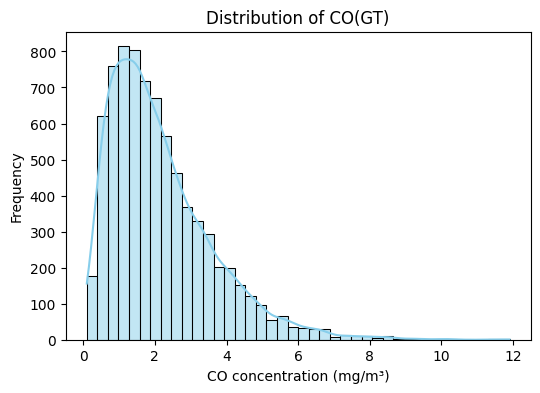

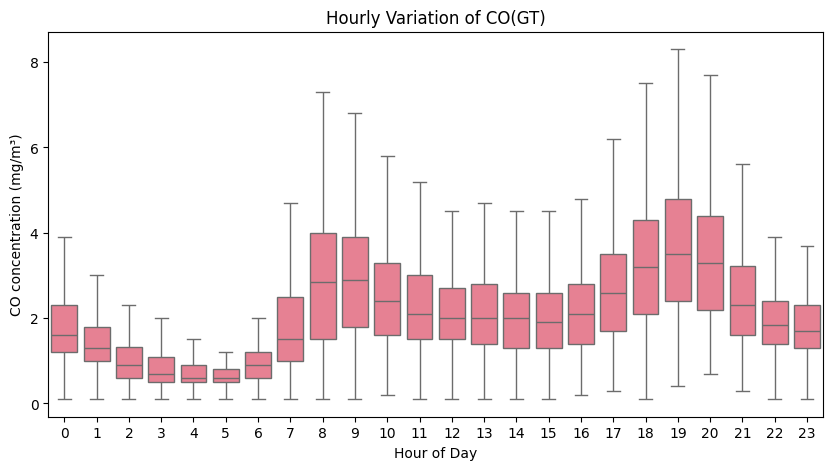

In [ ]:
# Target variable analysis
target = "CO(GT)"
print(f"Target variable: {target}")
display(df[target].describe())

print("\nDistribution preview:")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df[target].dropna(), bins=40, kde=True, color="skyblue")
plt.title("Distribution of CO(GT)")
plt.xlabel("CO concentration (mg/m³)")
plt.ylabel("Frequency")
plt.show()

# Visualize target distribution (by time of day)
df["hour"] = df.index.hour
df["weekday"] = df.index.weekday

plt.figure(figsize=(10,5))
sns.boxplot(x="hour", y=target, data=df, showfliers=False)
plt.title("Hourly Variation of CO(GT)")
plt.xlabel("Hour of Day")
plt.ylabel("CO concentration (mg/m³)")
plt.show()

count         mean         std       min        25%  \
CO(GT)         7674.0     2.152750    1.453252    0.1000     1.1000   
PT08_S1(CO)    8991.0  1099.833166  217.080037  647.0000   937.0000   
NMHC(GT)        914.0   218.811816  204.459921    7.0000    67.0000   
C6H6(GT)       8991.0    10.083105    7.449820    0.1000     4.4000   
PT08_S2(NMHC)  8991.0   939.153376  266.831429  383.0000   734.5000   
NOx(GT)        7718.0   246.896735  212.979168    2.0000    98.0000   
PT08_S3(NOx)   8991.0   835.493605  256.817320  322.0000   658.0000   
NO2(GT)        7715.0   113.091251   48.370108    2.0000    78.0000   
PT08_S4(NO2)   8991.0  1456.264598  346.206794  551.0000  1227.0000   
PT08_S5(O3)    8991.0  1022.906128  398.484288  221.0000   731.5000   
T              8991.0    18.317829    8.832116   -1.9000    11.8000   
RH             8991.0    49.234201   17.316892    9.2000    35.8000   
AH             8991.0     1.025530    0.403813    0.1847     0.7368   
hour           9357.0    11.498557    6.923182    0.0000     5.0000   
weekday        9357.0     3.009939    2.000323    0.0000     1.0000   

                     50%        75%       max  
CO(GT)            1.8000     2.9000    11.900  
PT08_S1(CO)    1063.0000  1231.0000  2040.000  
NMHC(GT)        150.0000   297.0000  1189.000  
C6H6(GT)          8.2000    14.0000    63.700  
PT08_S2(NMHC)   909.0000  1116.0000  2214.000  
NOx(GT)         180.0000   326.0000  1479.000  
PT08_S3(NOx)    806.0000   969.5000  2683.000  
NO2(GT)         109.0000   142.0000   340.000  
PT08_S4(NO2)   1463.0000  1674.0000  2775.000  
PT08_S5(O3)     963.0000  1273.5000  2523.000  
T                17.8000    24.4000    44.600  
RH               49.6000    62.5000    88.700  
AH                0.9954     1.3137     2.231  
hour             11.0000    18.0000    23.000  
weekday           3.0000     5.0000     6.000

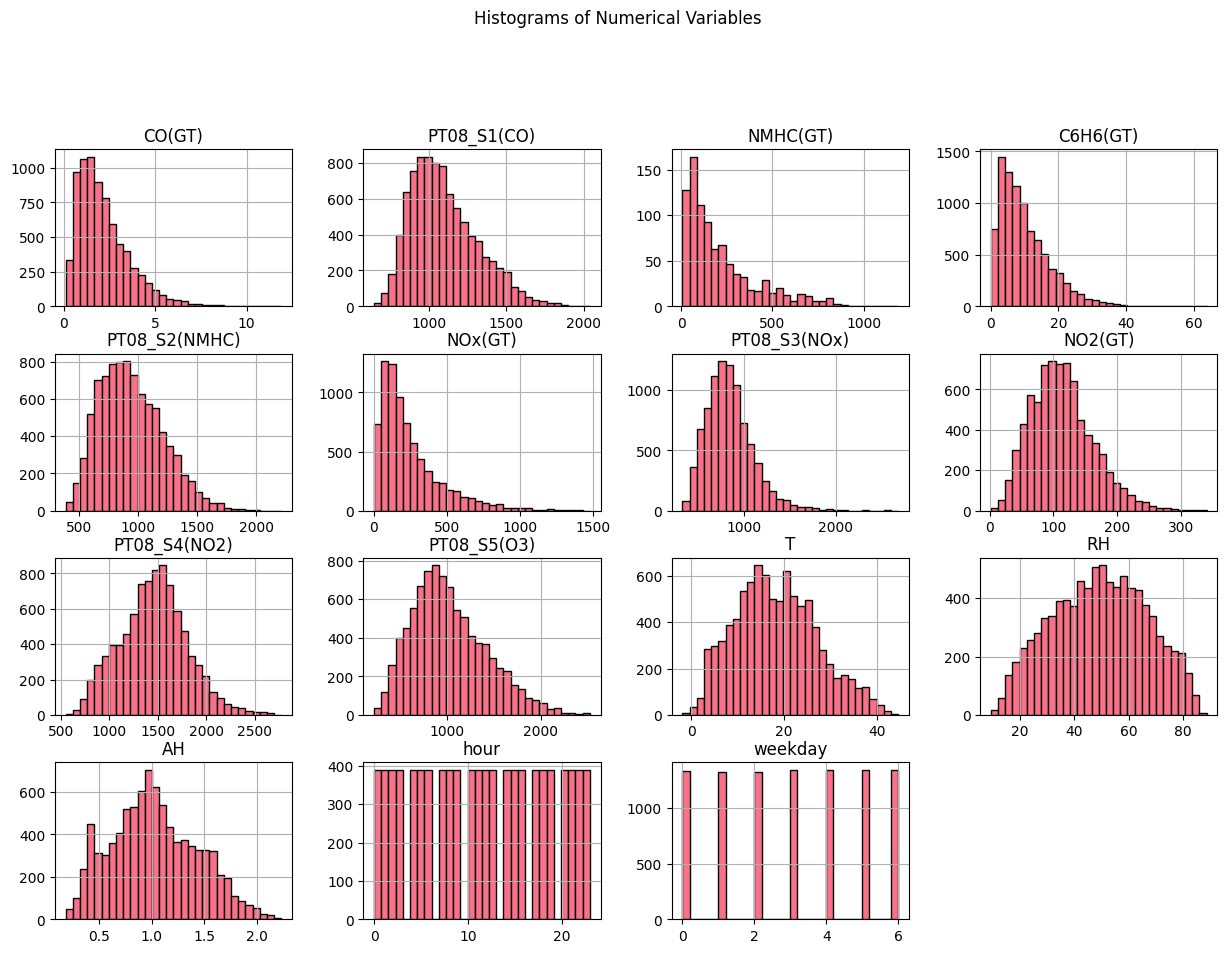

In [ ]:
# Numerical variables analysis
num_cols = df.select_dtypes(include=["float", "int"]).columns
num_cols = [c for c in num_cols if not c.startswith("Unnamed")]
display(df[num_cols].describe().T)

# Create histograms for numerical variables
df[num_cols].hist(figsize=(15,10), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Variables", y=1.02)
plt.show()

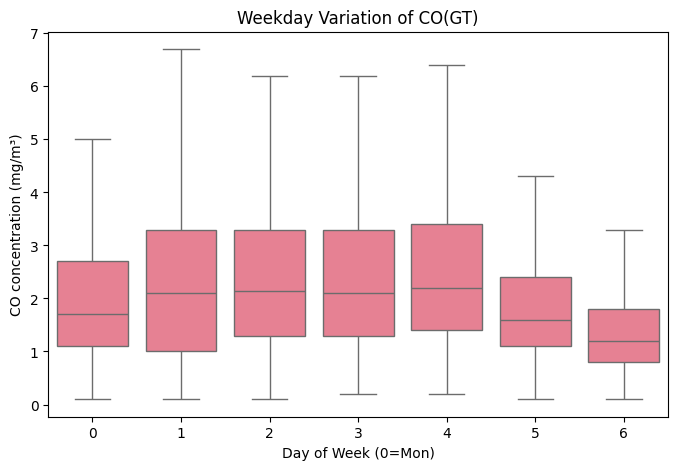

In [49]:
# Time-based categorical analysis
# Examine how CO(GT) varies by hour of day and day of week
plt.figure(figsize=(8,5))
sns.boxplot(x="weekday", y=target, data=df, showfliers=False)
plt.title("Weekday Variation of CO(GT)")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("CO concentration (mg/m³)")
plt.show()

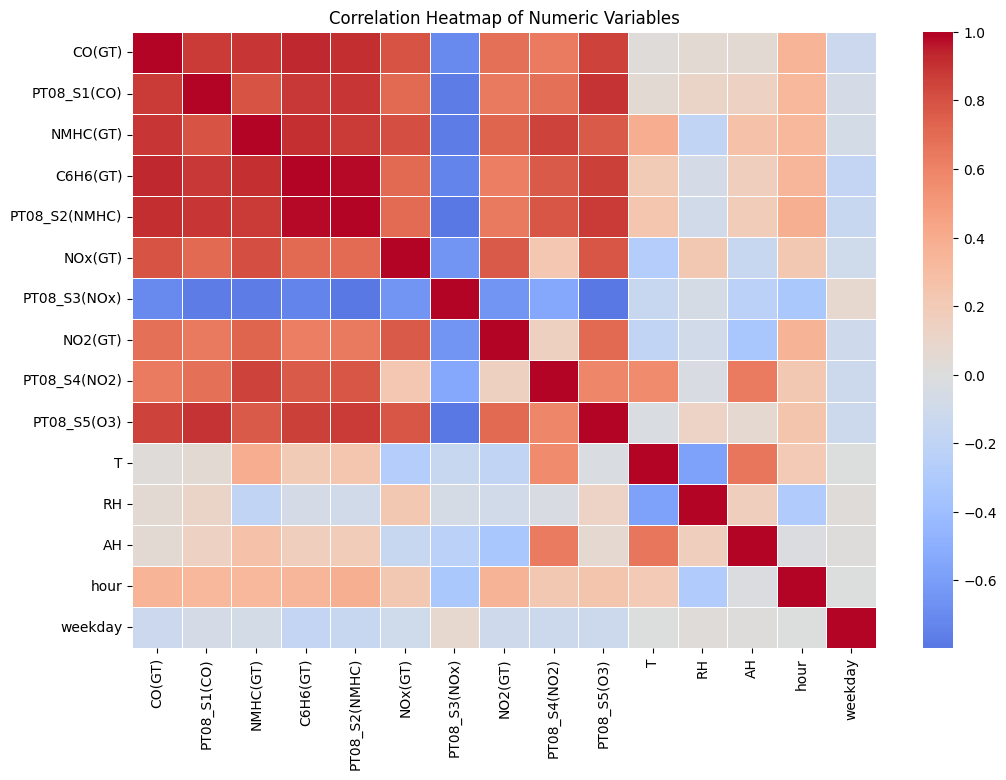

In [52]:
# Correlation analysis
corr = df[num_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


=== RELATIONSHIPS WITH TARGET ===


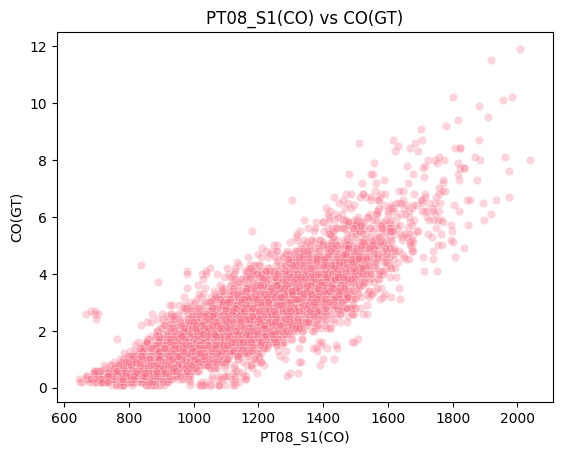

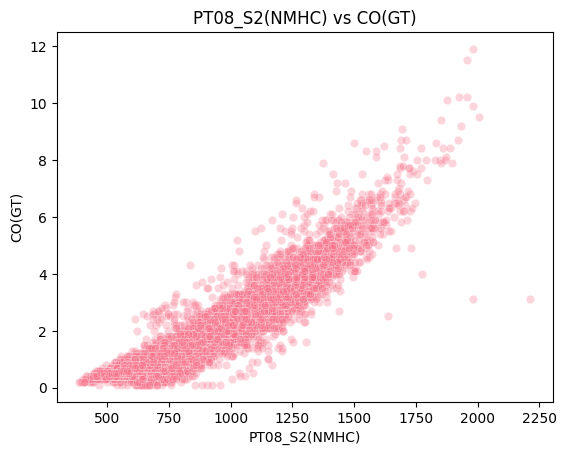

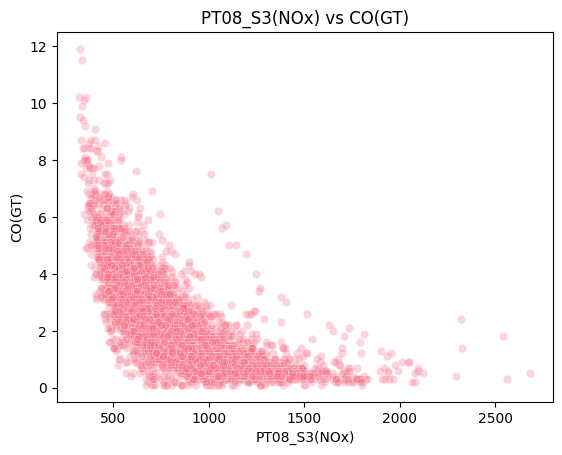

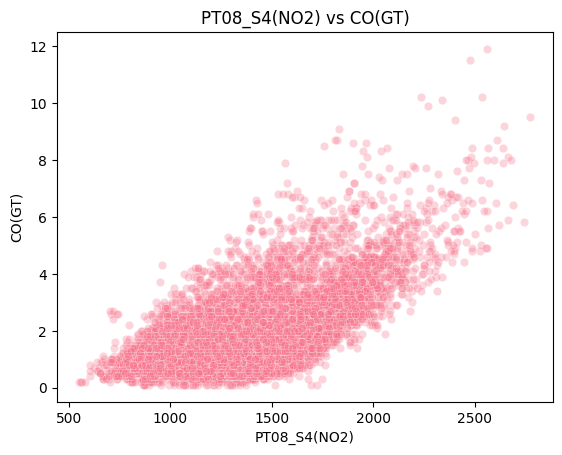

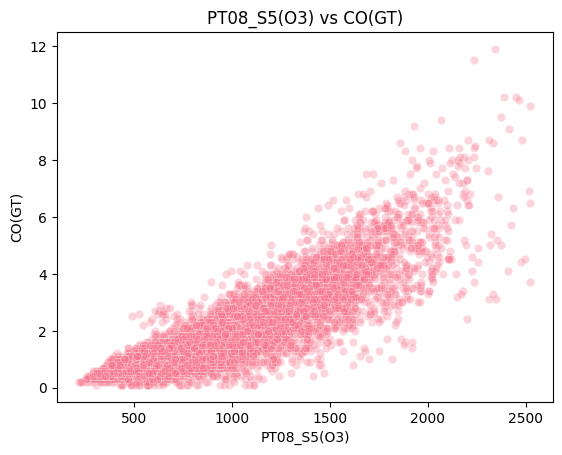

In [64]:
# Relationship between variables and target
print("=== RELATIONSHIPS WITH TARGET ===")
key_sensors = ["PT08_S1(CO)", "PT08_S2(NMHC)", "PT08_S3(NOx)", "PT08_S4(NO2)", "PT08_S5(O3)"]

for col in key_sensors:
    sns.scatterplot(x=col, y=target, data=df, alpha=0.3)
    plt.title(f"{col} vs {target}")
    plt.show()


## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: Weekday rush-hour amplification
**H1:** The average CO(GT) concentration is higher during weekday rush hours than during the same hours on weekends.  
- **Null Hypothesis (H0):** There is no difference in CO(GT) concentrations between weekday and weekend rush hours.
- **Alternative Hypothesis (H1):** CO(GT) concentrations are significantly higher during weekday rush hours.
- **Rationale:** The EDA and plot above showed clear morning and evening peaks in CO(GT), which are stronger on weekdays. This pattern suggests traffic-related emissions are reduced on weekends.

### Hypothesis 2: Temperature influence on pollutant concentration
**H2:** CO(GT) concentrations are lower during warmer conditions.
- **Null Hypothesis (H0):** Temperature and CO(GT) are independent. 
- **Alternative Hypothesis (H1):** CO(GT) decreases as temperature increases.  
- **Rationale:** The correlation matrix and boxplots showed a negative relationship between CO(GT) and temperature. Warmer air enhances dispersion and vertical mixing, leading to lower pollutant concentrations.

### Hypothesis 3: Humidity-modulated sensor correlation
**H3:** The correlation between PT08_S1(CO) and CO(GT) is weaker under high humidity conditions than under dry conditions.  
- **Null Hypothesis (H0):** Humidity does not affect the correlation between PT08_S1(CO) and CO(GT).  
- **Alternative Hypothesis (H1):** The correlation between PT08_S1(CO) and CO(GT) decreases as humidity increases.
- **Rationale:** EDA and scatter plots above showed that humidity modulates sensor-target relationships. High humidity may alter sensor response and reduce measurement accuracy due to cross-sensitivity effects.
---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: [Your first hypothesis]

**Test Choice:** [t-test, chi-square, correlation, etc.]
- **Why appropriate:** [Explain why this test is suitable for your data and hypothesis]


In [ ]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

# Your code for testing hypothesis 1 here
# Example structure:
# 1. Prepare your data
# 2. Check assumptions if needed
# 3. Perform the statistical test
# 4. Interpret results

# Example for t-test:
# group1 = df[df['condition'] == 0]['variable']
# group2 = df[df['condition'] == 1]['variable']
# t_stat, p_value = stats.ttest_ind(group1, group2)
# print(f"t-statistic: {t_stat:.4f}")
# print(f"p-value: {p_value:.4f}")
# 
# if p_value < 0.05:
#     print("Reject H0: There is a significant difference")
# else:
#     print("Fail to reject H0: No significant difference")

print("Replace this with your actual hypothesis 1 testing code")


=== TESTING HYPOTHESIS 1 ===
Replace this with your actual hypothesis 1 testing code


### Testing Hypothesis 2: [Your second hypothesis]

**Test Choice:** [t-test, chi-square, correlation, etc.]
- **Why appropriate:** [Explain why this test is suitable for your data and hypothesis]


In [ ]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")

# Your code for testing hypothesis 2 here
# Example for chi-square test:
# contingency_table = pd.crosstab(df['var1'], df['var2'])
# chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
# print(f"Chi-square statistic: {chi2:.4f}")
# print(f"p-value: {p_value:.4f}")
# 
# if p_value < 0.05:
#     print("Reject H0: Variables are significantly associated")
# else:
#     print("Fail to reject H0: No significant association")

print("Replace this with your actual hypothesis 2 testing code")


=== TESTING HYPOTHESIS 2 ===
Replace this with your actual hypothesis 2 testing code


### Testing Hypothesis 3: [Your third hypothesis - if applicable]

**Test Choice:** [t-test, chi-square, correlation, etc.]
- **Why appropriate:** [Explain why this test is suitable for your data and hypothesis]


In [ ]:
# Hypothesis 3 Testing (if applicable)
print("=== TESTING HYPOTHESIS 3 ===")

# Your code for testing hypothesis 3 here
print("Replace this with your actual hypothesis 3 testing code")


=== TESTING HYPOTHESIS 3 ===
Replace this with your actual hypothesis 3 testing code


## 5. Summary and Conclusions

### Key Findings from EDA:
1. [List your main observations from the exploratory analysis]
2. [Describe patterns you identified]
3. [Note any interesting relationships]

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | [Test name] | [p-value] | [Significant/Not] | [Brief interpretation] |
| **H2** | [Test name] | [p-value] | [Significant/Not] | [Brief interpretation] |
| **H3** | [Test name] | [p-value] | [Significant/Not] | [Brief interpretation] |

### Key Insights:
- [What do your results tell you about the data?]
- [What are the practical implications?]
- [What limitations should be considered?]

### Future Research:
- [What additional analysis could be done?]
- [What other variables might be important?]

---

**Note:** Remember to replace the sample data with your actual dataset and fill in all the template sections with your own analysis and interpretations.


In [ ]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: [Your dataset name]")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"\nAnalysis completed successfully!")
print("\nRemember to:")
print("1. Replace sample data with your actual dataset")
print("2. Fill in all template sections with your analysis")
print("3. Provide clear explanations for your choices")
print("4. Interpret your results meaningfully")


=== ANALYSIS COMPLETE ===
Dataset analyzed: [Your dataset name]
Sample size: 9357 observations
Number of features: 16 (excluding target)

Analysis completed successfully!

Remember to:
1. Replace sample data with your actual dataset
2. Fill in all template sections with your analysis
3. Provide clear explanations for your choices
4. Interpret your results meaningfully
